# Superstore Sales Analysis

This project analyzes data from a fictional retail chain.

We will explore trends and patterns to make conclusions to support better business practices.

**Tools**

    - Python
    - Jupyter Notebook
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn
    - Plotly
    - Scikitlearn
    - Statsmodels
    - Pmdarima

**Objectives**

    - Examine monthly sales and profit.
    - Evaluate how discounts affect sales and profit.
    - Analyze the performance of products by category/sub-category.
    - Look at segments of customers.
    - Examine differences in business performance between regions/states.
    - Analyze shipping methods in relation to shipping time.
    - Forecast future sales based on previous data.

**Methods Used**

    - Exploratory methods using graphs and charts.
    - KMeans Clustering using Machine Learning.
    - ARIMA to forecast future trends.

-----

## Data Intialization and Setup

In this section we setup all of the important libraries and data to perform the data analysis

***This Section Includes:***

    - Importing Libraries.
    - Loading the Dataset.
    - Providing a summary of the dataset.
    - Cleaning the Data.
    - Altering how columns of data are stored and creating new useful columns.

----

In [1]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Libraries for ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Data cleaning
import warnings

In [2]:
# Load the Dataset
df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Initial Data Summary
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

0

In [4]:
# Data Cleaning
warnings.filterwarnings("ignore", category=FutureWarning)
# Datetime conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Remove duplicate entries
df = df.drop_duplicates()

# Add other useful columns
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df["Profit Margin"] = df["Profit"] / df["Sales"]



# Data Analysis

----

## Monthly Sales and Profit

***This Section Includes:***

    - Total Sales and Profit by Month.
    - Average Sales and Profit by Month.
    - Conclusions based off of the Data.

----

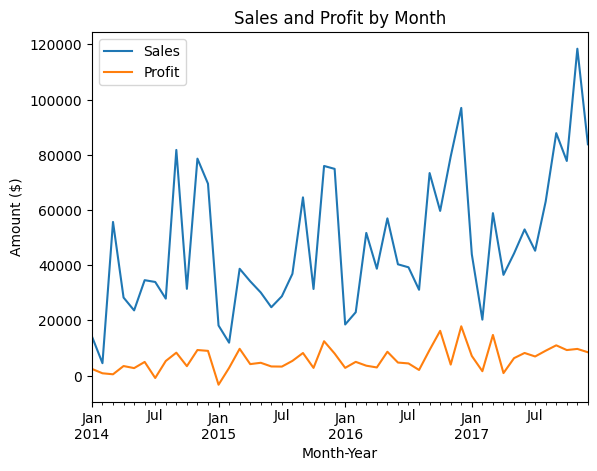

In [5]:
df["Month-Year"] = df["Order Date"].dt.to_period("M")
monthly = df.groupby("Month-Year")[["Sales","Profit"]].sum().reset_index()

monthly.plot(x="Month-Year", y=["Sales","Profit"], kind="line")
plt.title("Sales and Profit by Month")
plt.ylabel("Amount ($)")
plt.show()

---
This chart shows the trend of sales and profit by month. We can see that the peaks are getting progresssively higher as time passes as well as the middle points as well becoming higher.

There is a large fluctuation in profits throughout the year suggesting a sizeable gap between busy seasons and slower seasons.

The profit is relatively stagnant throughout the entire graph, this shows that during slow seasons, they compensate well for the lack of sales to still pull a good profit.

The average profit has not greatly changed from the start of the data to the present day data showing that although they have increased sales, they have not managed to increase profits significantly.

---

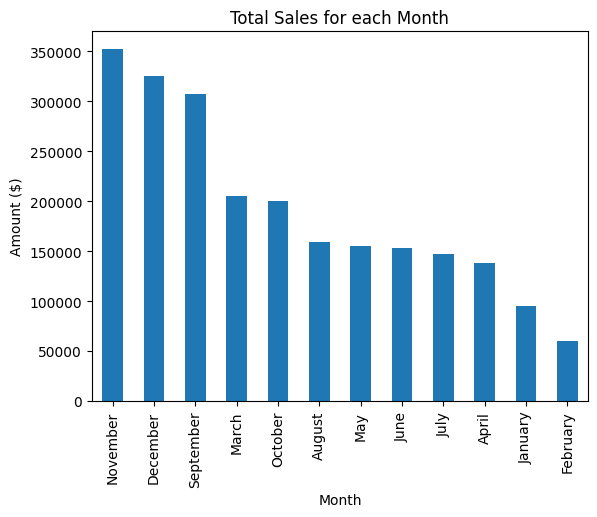

In [6]:
df["Month"] = df["Order Date"].dt.month_name()
df.groupby("Month")["Sales"].sum().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Total Sales for each Month")
plt.ylabel("Amount ($)")
plt.show()


---
This graph shows the total sales produced in each month throughout the entire timeframe of the data.

This shows that November, December, and September are high selling months while April, January and February are among the lowest selling months.

There is a significant gap between the highest selling month (November) and the lowest selling month (February) which confirms the conclusion of the previous the graph in how much fluctuation there is throughout the year.

---

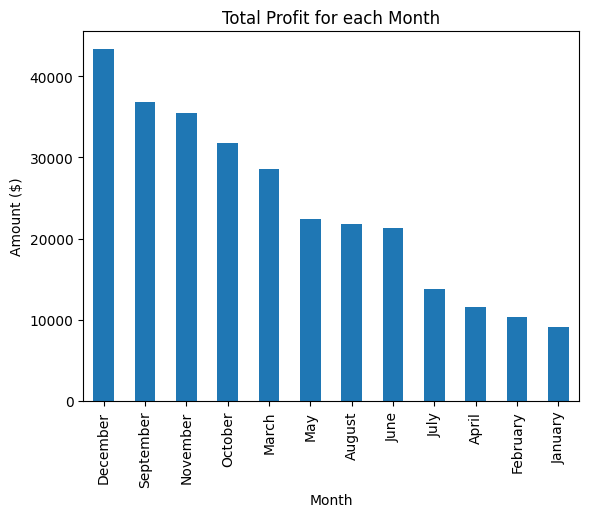

In [7]:
df.groupby("Month")["Profit"].sum().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Total Profit for each Month")
plt.ylabel("Amount ($)")
plt.show()

---
This graph shows the total profit made in each month throughout the timeframe of the data.

This shows a similar conclusion the the previous graph, the high selling months are also the highest profit-making months, and the low selling months are also the lowest profit-making months.

The gap between the highest profiting month and the lowest profiting month is much smaller than the gap between the highest and lowest sales months.

---

----
### Key Takeaways

- There are large fluctuations throughout the year in sales, showing high differences between high and low selling months.
- The profit made in each month does not fluctuate as heavily, showing that even in low-selling months, the profit made does not drastically drop off.
- The amount of profit being made has not significantly increased over a three-year timeframe of data, showing that the company perhaps needs to take measures to increase the profit margin.
---------

## How Discounts Affect Sales & Profit

***This Section Includes***

- A Scatterplot to compare Profit and Discount.
- A correlation matrix to find how Discounts relate to Profit, Sales, and Quantity.
- A comparison of profits of sub-categories of products when they are discounted vs non-discounted.

---

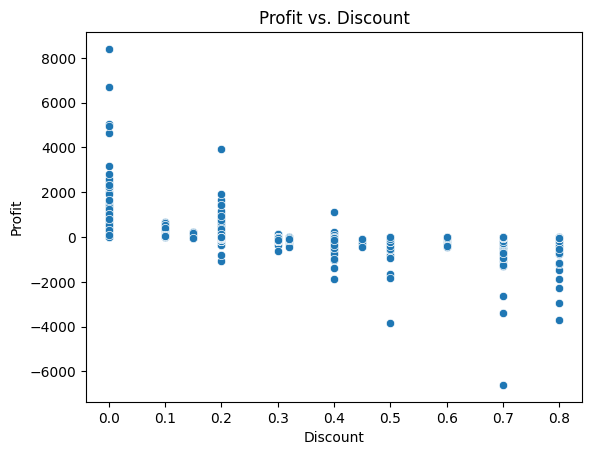

In [8]:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title('Profit vs. Discount')
plt.show()

---
This scatterplot shows how profit is generally higher the smaller the discount is.

At very high discount rates, the profit is mostly <= 0. Whereas in the cases of little to no discounts, the sales seem to at least come close to breaking even, with alot of cases making very big profits.

---

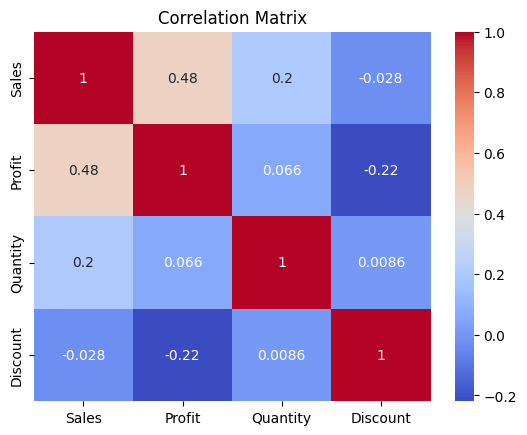

In [9]:
corr = df[["Sales","Profit","Quantity","Discount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

------
This correlation matrix shows that Discount is not strongly correlated with the other three fields.

The strongest correlation in regards to Discount shows a -0.22 correlation coefficient with Profit. This tells us that there is a weak correlation between discounts going up and profits going down and vice versa.

The correlation between Discount and Sales and Discount and Quantity are both near zero, showing that there is no real change in Sales and Quantity sold between there being discounts or not.

-----

In [10]:
df["Discounted"] = df["Discount"] > 0

profit_comp = df.groupby(["Sub-Category","Discounted"])["Profit"].mean().unstack()
profit_comp.columns = ["No Discount", "With Discount"]

profit_comp

,No Discount,With Discount
Sub-Category,,
Accessories,74.924106,21.866388
Appliances,85.548842,-25.875542
Art,10.804419,3.849619
Binders,116.660091,-7.666684
Bookcases,101.261862,-56.834927
Chairs,164.910497,9.622046
Copiers,1616.187950,436.123696
Envelopes,32.743318,19.482277
Fasteners,5.095353,3.340596


---
This table shows quite clearly, as expected that the profit made on sales is always higher without discounts.

Although there are some categories of products where the profits to not heavily flucuate, such as; Fasteners, Art, and Labels.

The more concerning products are those that show heavy flucuation in profits, especially those that start making losses such as; Tables, Machines, Bookcases, Supplies, and Appliances.

---

### Key Takeaways

- Discounts in general seem to lack effectiveness in both making a profit and pushing quantity.
- As shown by the correlation matrix, Discounts do not generally help to make bigger sales and push more quantity as desired.
- Products in the categories of Tables, Machines, Bookcases, and Appliances, along with others that are negatively impacted by the introduction of discounts, should not have discounts offered to avoid making unnecessary losses on otherwise profitable products.
- Overall, discounts lack impact and should be generally limited in their application.

-----

## Categorical Analysis

***This Section Includes***

- A Comparison of the number of orders by category.
- A Comparison of total sales and profit by category and sub-category.
- A Demonstration of the KMeans clustering process.
- Analysis of the Sales, Profit, Quantity, and Discount between clusters.

----

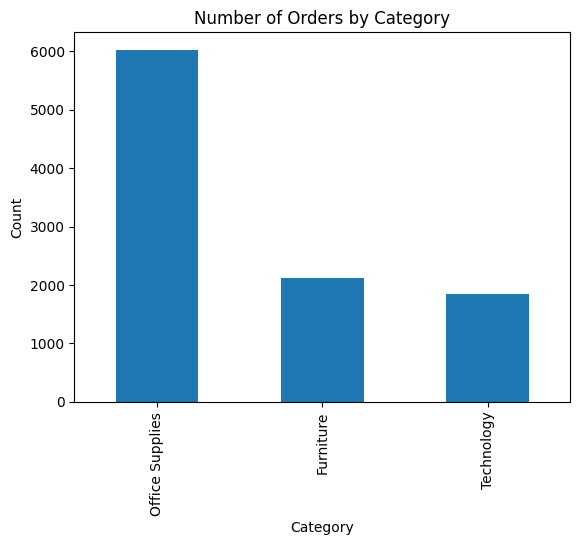

In [11]:
df["Category"].value_counts().plot(kind="bar")
plt.title("Number of Orders by Category")
plt.ylabel("Count")
plt.show()

---
This bar graph shows the number of orders placed for products under each category, showing that products under the category of Office Supplies is by far the most ordered.

---

In [12]:
df.groupby("Category")[["Sales","Profit"]].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


---
This chart shows the total Sales and Profit made by products in each category. This shows clearly that although Furniture has the second highest amount of sales, the profit is by far the lowest, demonstrating that compared to the other categories, furniture is by far the most underperforming.

---

In [13]:
df.groupby("Sub-Category")[["Sales","Profit"]].sum()

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


---
This chart above shows the total sales and profit made by products in each sub-category.

It follows that products under the categories of Tables, Supplies, and Bookcases have all made a loss throughout the history of selling them. Specifically, Tables are the most concerning, as although they demonstrate high sales, they still turn quite a significant loss.

Categories like Phones, Storage, Copiers, Chairs, Binders, Appliances, and Accessories show quite a high profit for high-selling products, showing that they are quite high-performing products.

While the Paper category shows quite a high amount of profit for relatively lower sales, showing that paper is highly profitable.

---

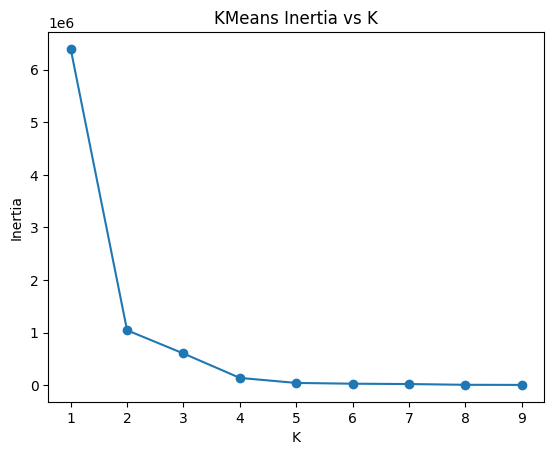

In [14]:
product_data = df.groupby("Sub-Category")[["Sales","Profit","Quantity","Discount"]].mean()

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_data)

# find the optimal amount of clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=45)
    kmeans.fit(product_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.title("KMeans Inertia vs K")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

As the plot shows, there is an elbow point at k=3 so we choose that as our number of clusters

---

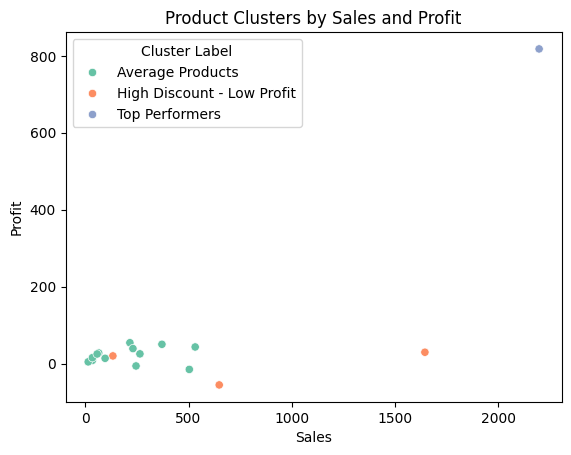

In [15]:
# Since 3 appears to be the approximate elbow point, we choose k=3

# Assign each state to one of 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
product_data["Product-Cluster"] = kmeans.fit_predict(scaled_data)

cluster_labels = {
    0: "Top Performers",
    1: "Average Products",
    2: "High Discount - Low Profit" 
}

product_data["Cluster Label"] = product_data["Product-Cluster"].map(cluster_labels)

sns.scatterplot(data=product_data, x="Sales", y="Profit", hue="Cluster Label", palette="Set2")
plt.title("Product Clusters by Sales and Profit")
plt.show()

---
This graph above shows where the different clusters lay on a chart on Profit vs. Sales.

---

In [16]:
product_data.groupby("Cluster Label")[["Sales","Profit","Discount","Quantity"]].mean()

,Sales,Profit,Discount,Quantity
Cluster Label,,,,
Average Products,204.973908,21.815511,0.111656,3.762319
High Discount - Low Profit,809.302881,-2.096510,0.313221,3.879630
Top Performers,2198.941618,817.909190,0.161765,3.441176


---
This chart shows how the different clusters compare in the four different columns.

We label the three clusters using descriptive labels to describe common trends among the cluster.

---

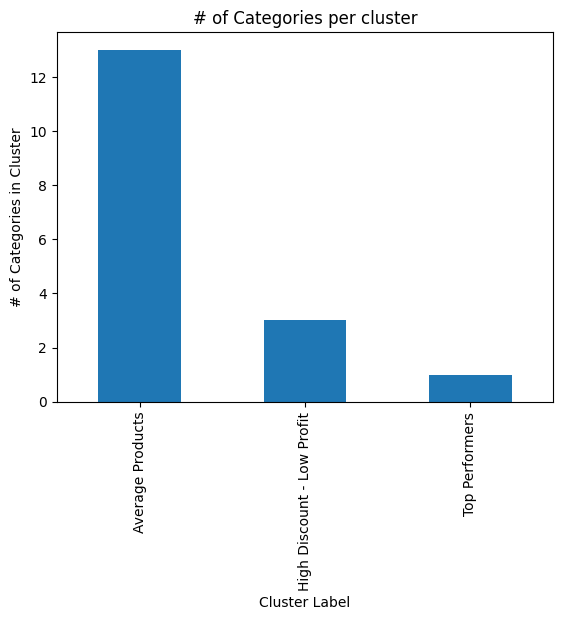

In [17]:
product_data.reset_index().groupby("Cluster Label")["Sub-Category"].count().plot(kind="bar")
plt.ylabel("# of Categories in Cluster")
plt.title("# of Categories per cluster")
plt.show()

---
This bar graph shows the amount of categories put into each cluster, where most categories are put into the "Average Products" cluster.

---

In [18]:
for cluster in sorted(product_data["Cluster Label"].unique()):
    print(f"\n{cluster}:")
    print(product_data[product_data['Cluster Label'] == cluster].index.tolist())


Average Products:
['Accessories', 'Appliances', 'Art', 'Bookcases', 'Chairs', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Paper', 'Phones', 'Storage', 'Supplies']

High Discount - Low Profit:
['Binders', 'Machines', 'Tables']

Top Performers:
['Copiers']


---
Above is a list of where each category falls into their respective cluster.

---

---
### Key Takeaways

- As seen from the cluster analysis, Copiers has an outstanding performance purely based off of their respective Sales and Profit.
- Binders, Machines, and Tables, as shown from the cluster analysis, are all heavily discounted while providing an overall negative mean profit.
- As seen from the first graph, the overall category of Furniture is significantly less profitable than the other two categories.
- While the average product makes decent profit with limited discounts.
- The lowest performing categories are those that are heavily discounted on average as seen in the cluster analysis, showing once again that discounts are generally not effective while not pushing significantly more quantity than an average product.

---

---
## Segment Analysis

***This Section Includes***

- An analysis of total and mean profit and sales by customer segment.
- Profit margin by customer segment.

---

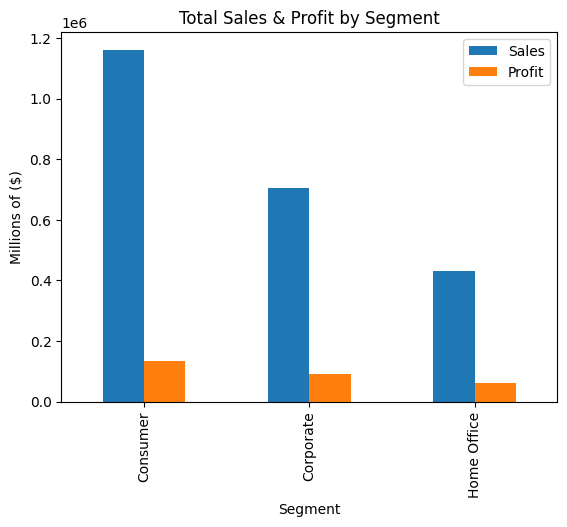

In [19]:
# Segment
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind='bar')
plt.title("Total Sales & Profit by Segment")
plt.ylabel("Millions of ($)")
plt.show()

---
This plot shows the total sales and profit (in millions of $) of the three customer segments.

This shows that Consumers bring in the most sales, although all segments bring in similar amounts of profit despite varying sales numbers.

---

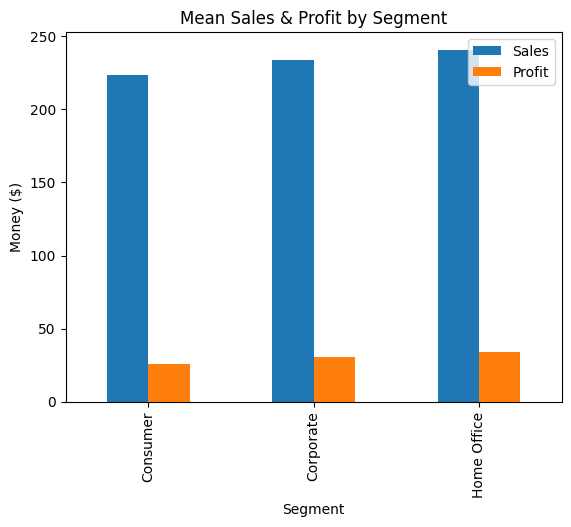

In [20]:
df.groupby("Segment")[["Sales","Profit"]].mean().plot(kind='bar')
plt.title('Mean Sales & Profit by Segment')
plt.ylabel("Money ($)")
plt.show()

---
This chart shows the mean sales and profit made by each segment.

This chart shows that on average, each segment performs very similarily.

---

In [21]:
df.groupby('Segment')["Profit Margin"].mean()

Segment
Consumer       0.112050
Corporate      0.121203
Home Office    0.142870
Name: Profit Margin, dtype: float64

---
This chart shows the average profit margin made by each segment.

This shows that the Home Office segment has the highest profit margin.

---

---
### Key Takeaways

- The profit margin made by each segment is very similar, showing that different segments do not significantly affect proft margin.
- Although the consumer segment has by far the most sales, the profits are relatively low.
- The profit and sales made on average between each segment are very similar showing no significant difference.

---

## Region and State Analysis

***This Section Includes***

- The Top and Bottom 10 states and cities by profit.
- Profit share by region.
- Cluster analysis by states.

---

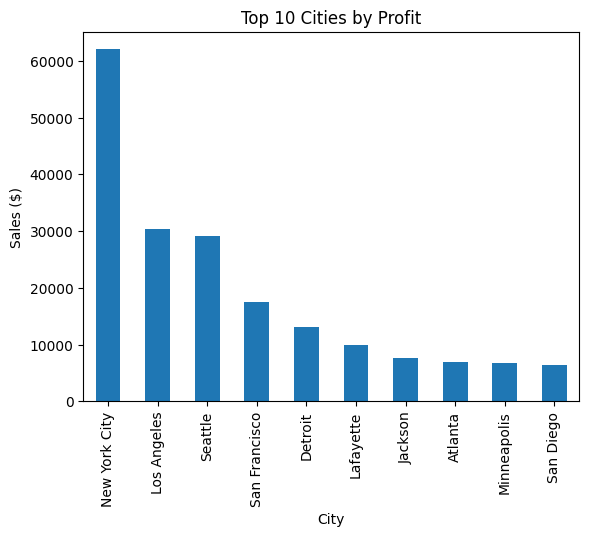

In [22]:
df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Profit')
plt.ylabel('Sales ($)')
plt.show()

---
This chart shows the total profit made by the top 10 perfoming cities.

New York City has by far the most profit with Los Angeles and Seattle behind by around half.

---

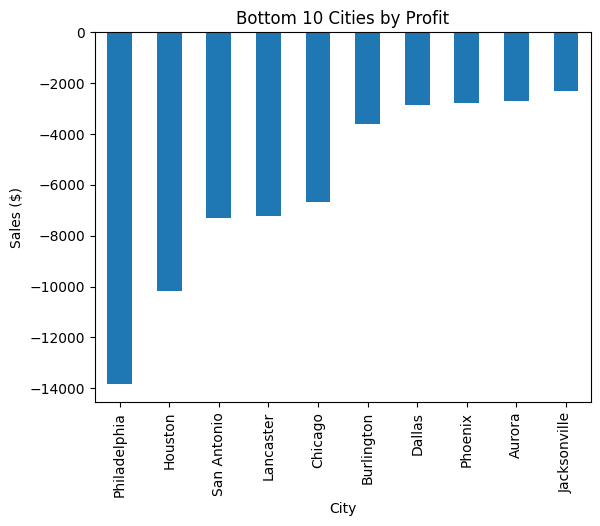

In [23]:
df.groupby("City")["Profit"].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('Bottom 10 Cities by Profit')
plt.ylabel('Sales ($)')
plt.show()

---
This graph shows the Profit made by the bottom 10 performing cities.

Philadelphia is the city with the lowest profit, with Houston behind it.

All of the Bottom 10 cities have negative profit.

---

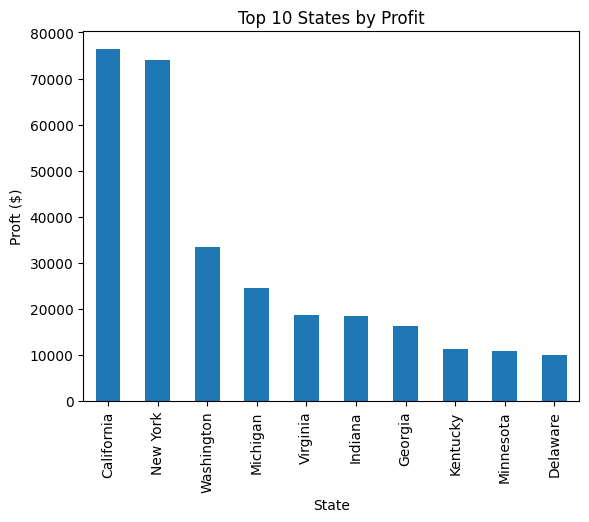

In [24]:
df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States by Profit")
plt.ylabel("Proft ($)")
plt.show()

---
This graph shows the top 10 states by profit.

California and New York are significant front runners, having around double the profit made by the next highest profit state, Washington.

---

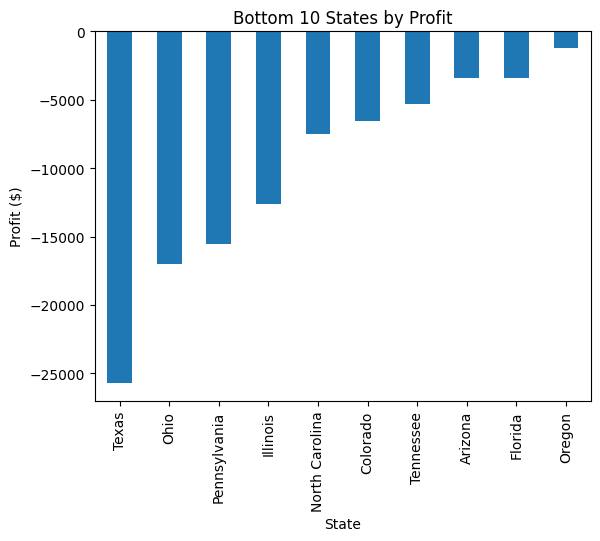

In [25]:
df.groupby("State")["Profit"].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title("Bottom 10 States by Profit")
plt.ylabel("Profit ($)")
plt.show()

---
This graph shows the bottom 10 States by profit made.

Texas is the worst performing state by profit, with Ohio and Pennsylvania following.

---

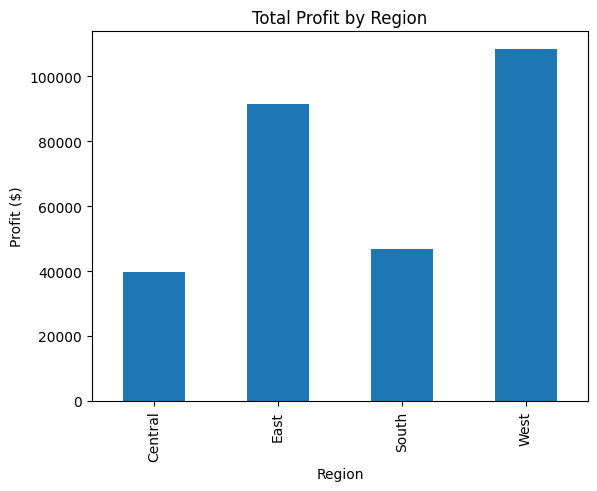

In [26]:
df.groupby("Region")["Profit"].sum().plot(kind='bar')
plt.title("Total Profit by Region")
plt.ylabel("Profit ($)")
plt.show()

---
This graph shows the total profit made by each region.

West and East clearly have the highest total profit made.

---

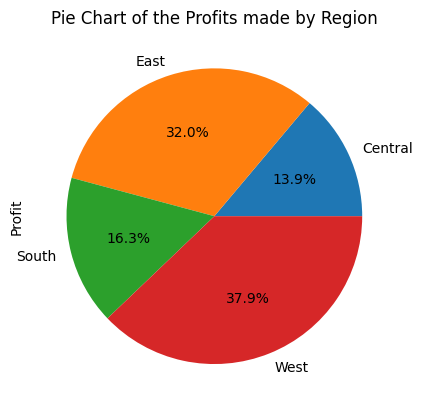

In [27]:
df.groupby("Region")["Profit"].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart of the Profits made by Region")
plt.show()

---
Above is a pie chart showing the share of the total profit the company made by each region.

---

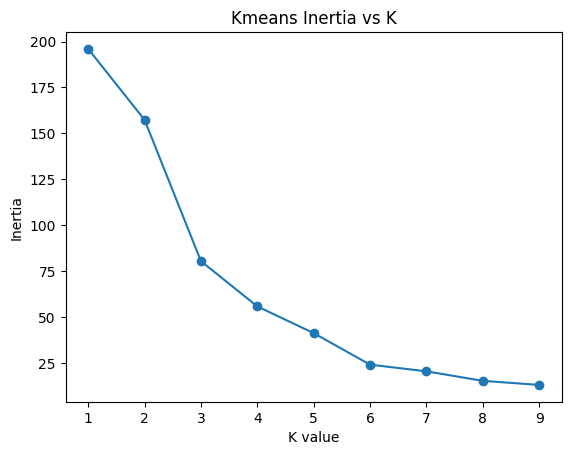

In [28]:
state_data = df.groupby("State")[["Sales","Profit","Discount","Quantity"]].mean()

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_data)

# find the optimal amount of clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.ylabel("Inertia")
plt.xlabel("K value")
plt.title("Kmeans Inertia vs K")
plt.show()

---
Graph of Inertia vs K value, showing an elbow point at around k=5, so 5 is the chosen number of clusters to be used.

---

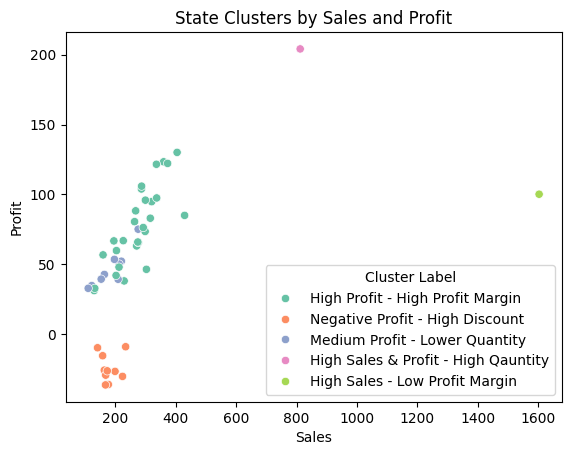

In [29]:
# Since 5 appears to be the approximate elbow point, we choose k=5

# Assign each state to one of 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
state_data["State-Cluster"] = kmeans.fit_predict(scaled_data)

cluster_labels = {
    0: "High Profit - High Profit Margin",
    1: "High Sales - Low Profit Margin",
    2: "Negative Profit - High Discount",
    3: "Medium Profit - Lower Quantity",
    4: "High Sales & Profit - High Qauntity"
    
}

state_data["Cluster Label"] = state_data["State-Cluster"].map(cluster_labels)

sns.scatterplot(data=state_data, x="Sales", y="Profit", hue="Cluster Label", palette="Set2")
plt.title("State Clusters by Sales and Profit")
plt.show()

---
Above is a scatterplot of the 5 clusters compared with Profit on the y-axis and Sales on the x-axis.

---

In [30]:
state_data["Profit Margin"] = state_data["Profit"] / state_data["Sales"]

state_data.groupby("Cluster Label")[["Sales","Profit","Discount","Quantity","Profit Margin"]].mean()

,Sales,Profit,Discount,Quantity,Profit Margin
Cluster Label,,,,,
High Profit - High Profit Margin,273.990177,77.381424,0.020240,3.996892,0.280586
High Sales & Profit - High Qauntity,811.760909,204.088936,0.000000,4.545455,0.251415
High Sales - Low Profit Margin,1603.136000,100.196000,0.200000,4.000000,0.062500
Medium Profit - Lower Quantity,184.305284,46.748948,0.012578,3.468188,0.257556
Negative Profit - High Discount,180.003861,-24.336105,0.319670,3.789877,-0.137455


---

This shows a chart of the five different clusters compared by 5 different measures.

Descriptive labels show how each cluster relates to eachother by their common attributes.

---

In [31]:
for cluster in sorted(state_data["Cluster Label"].unique()):
    print(f"\n{cluster}:")
    print(state_data[state_data['Cluster Label'] == cluster].index.tolist())


High Profit - High Profit Margin:
['Alabama', 'Arkansas', 'California', 'Delaware', 'District of Columbia', 'Georgia', 'Indiana', 'Kentucky', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Mexico', 'New York', 'North Dakota', 'Oklahoma', 'Rhode Island', 'South Carolina', 'Utah', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

High Sales & Profit - High Qauntity:
['Vermont']

High Sales - Low Profit Margin:
['Wyoming']

Medium Profit - Lower Quantity:
['Connecticut', 'Idaho', 'Iowa', 'Kansas', 'Louisiana', 'Massachusetts', 'Nebraska', 'New Jersey', 'South Dakota']

Negative Profit - High Discount:
['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas']


---
Above is a list of which state fits into which cluster

---

---
### Key Takeaways

- Vermont is a significant high performer with a high profit margin, high sales and profit, and with zero total discounts. This shows how successful a state can perform with no discounts applied.
- Wyoming has significantly high sales but, quite low profit with an average of a 20% discount. This relatively high discount rate could be the reason behind the low profit, despite a high amount of sales made.
- All states in the Negative Profit - High Discount cluster can be considered to be poor performers having a negative profit on average along with a high 31.97% average discount rate. Again, the trend of high discounts, low profit is prevalent.
- New York and California push high total profit although, neither show significant profit margins. Showing that the high profit made by both states is directly related to the high populations, driving high amounts of sales.
- Texas is a significantly lower performing state, both in terms total profit made and in terms of a poor profit margin. This shows that business in Texas is struggling quite substantially despite Texas being a largely populated state. Texas could perhaps benefit from lowering discount rates.

---

---
## Shipping Analysis

***This Section Includes***

- Histogram of delivery times.
- Comparison by region of delivery times.
- Comparison by shipping mode of delivery times.
- Boxplot showing the variation in delivery times by shipping method.

---

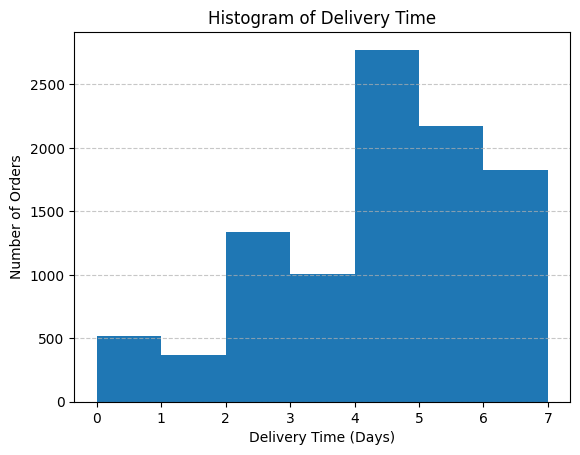

In [32]:
plt.hist(df["Delivery Time"], bins=range(df["Delivery Time"].min(),df["Delivery Time"].max() +1))
plt.xticks(range(df['Delivery Time'].min(), df['Delivery Time'].max() + 1))
plt.title("Histogram of Delivery Time")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---
This histogram shows the delivery times and how many orders fall into each delivery time period.

Most orders fall between a delivery time of 4-5 days.

---

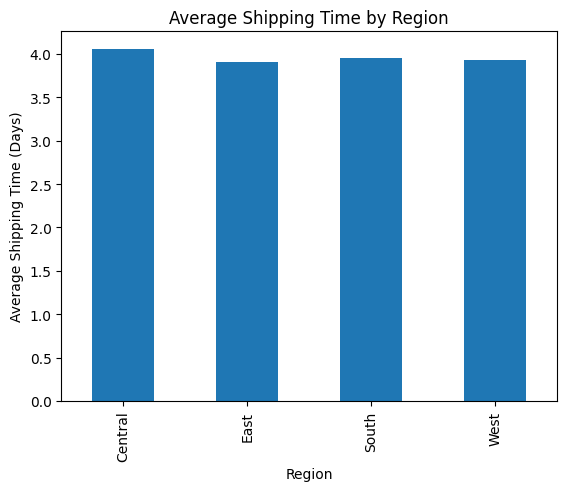

In [33]:
df.groupby('Region')['Delivery Time'].mean().plot(kind='bar')
plt.title('Average Shipping Time by Region')
plt.ylabel('Average Shipping Time (Days)')
plt.show()

---
This graph shows that the average delivery time by region shows no significant differences.

This shows that there is no issues with shipping in any of the regions as the average delivery times are almost the same.

---

In [34]:
df.groupby("Ship Mode")["Delivery Time"].mean()

Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64

---
The above chart shows the average delivery time by shipping mode.

The more expensive and expediated the shipping mode, the faster the delivery time is, and vice versa. This shows that the different shipping modes have their intended effects.

---

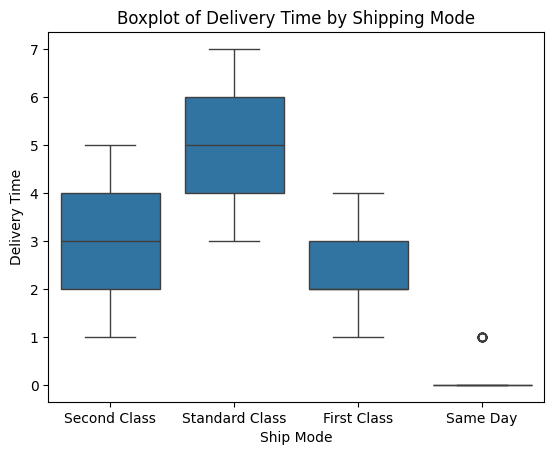

In [35]:
sns.boxplot(x="Ship Mode",y="Delivery Time",data=df)
plt.title("Boxplot of Delivery Time by Shipping Mode")
plt.show()

---
This boxplot shows the variations of delivery times by shipping mode.

Each shipping mode has a relatively normal distribution with no significant skew. 

The same day shipping shows a few outliers where the delivery was not made the same day (marked as 0 days) but instead 1 day.

---

---
### Key Takeaways

- Shipping is consistent throughout each region
- The different shipping modes achieve their desired effects, where the more expensive the mode you pick, the faster the delivery times.
- Same day shipping has a few outliers showing that in some cases, same day shipping was not executed as promised.
---

---
## Future Forecasting of Monthly Sales

***This Section Includes***

- ARIMA analysis to forecast future monthly sales

---

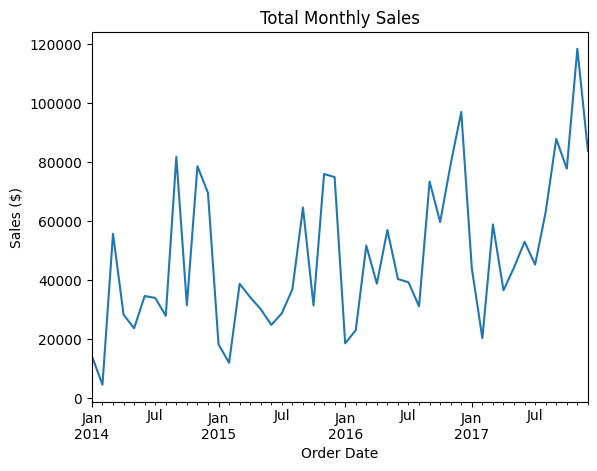

In [36]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

monthly_sales = df.set_index("Order Date").resample("ME")["Sales"].sum()
monthly_sales.plot()
plt.title("Total Monthly Sales")
plt.ylabel("Sales ($)")
plt.show()

---
Graph of the total monthly sales based off of current real data.

---

In [37]:
result = adfuller(monthly_sales)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


---
ADF test to see if the monthly sales data is stationary.

Since the p-value is < 0.05, the data is stationary, therefor ARIMA is able to be performed

---

In [38]:
model = auto_arima(monthly_sales, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.882, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.402, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.114, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.127, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.548, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.911, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.082, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.816, Time=0.04 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.489, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.759, Time=0.02 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.411, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.909, Time=0.01 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.137, Time=0.07 sec
 ARIMA(2,1,0)(1,0,1

---
Run of the auto ARIMA to find the best fit model

---

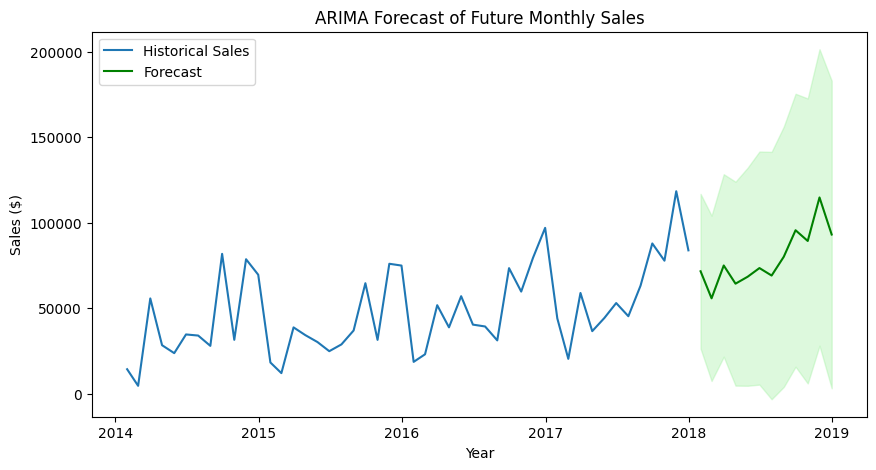

In [39]:
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

future_dates = pd.date_range(monthly_sales.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label="Historical Sales")
plt.plot(forecast_series, label="Forecast", color='green')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast of Future Monthly Sales")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.show()

---
Above shows the ARIMA analysis of future sales looking a year in advance.

This shows a steady increase in sales going along with the previous trends.

---

---
### Key Takeaways

- The forecasted future profits for the next year shows a promising general increase in sales as well as much more stable sales throughout the year.

---

## Conclusion and Recommendations

## 📌 Conclusion  

This analysis highlights several important trends across sales, discounts, categories, customers, and regions. While monthly sales volumes fluctuate heavily throughout the year, profits remain relatively stable, suggesting that profitability is not strongly tied to seasonal sales peaks. However, overall profit growth has been stagnant across the three-year period, indicating that margins may need to be improved to ensure long-term business sustainability.  

Discounts consistently show limited effectiveness: they neither drive higher sales volumes nor improve profitability. In fact, heavily discounted products and regions often perform worse, with negative profit margins despite high sales. Categories such as Copiers and Binders stand out on opposite ends of performance, with Copiers generating strong profit while Binders, Machines, and Tables underperform due to discount-driven losses.  

Customer segments show minimal differences in profit margins, although the Consumer segment dominates sales volume. Regional analysis reveals clear contrasts: Vermont performs strongly with no discounts, while states like Wyoming and Texas underperform despite high sales potential—likely due to excessive discounting and weaker profit margins. Shipping performance is consistent and aligned with expectations, although some same-day shipping failures highlight areas for operational improvement.  

The ARIMA forecasting model indicates that sales may stabilize and gradually increase in the coming year, offering optimism for future performance if profitability challenges are addressed.  

---

## 📌 Recommendations  

1. **Reduce or Restrict Discounts**  
   - Avoid blanket discounting, especially in categories like Tables, Machines, and Bookcases, where discounts directly reduce profitability.  
   - Use discounts more strategically (e.g., only for clearing low-demand inventory).  

2. **Focus on High-Performing Categories & Products**  
   - Expand offerings in categories like Copiers and other consistently profitable items.  
   - Reevaluate Furniture, especially underperforming segments, to determine whether repositioning or discontinuation is needed.  

3. **Target Underperforming Regions**  
   - Study successful states like Vermont (high profit, no discounts) as a model.  
   - Reduce discount reliance in states like Wyoming and Texas to improve margins.  

4. **Reassess Customer Strategy**  
   - Since segments show similar profit margins, focus less on pricing differentiation across them, and more on improving product mix and marketing strategies.  

5. **Operational Improvements**  
   - Address outliers in same-day shipping to ensure consistency with service promises.  

6. **Prepare for Growth**  
   - With future sales forecasted to rise steadily, the company should focus on maximizing profit margins during this growth rather than relying on volume alone.  
